In [13]:
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
import matplotlib.pyplot as plt 
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

/var/folders/k6/gg0yxj7x0tg9nllqx2xkm2rw0000gn/T/ipykernel_1925/1820901490.py:5: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


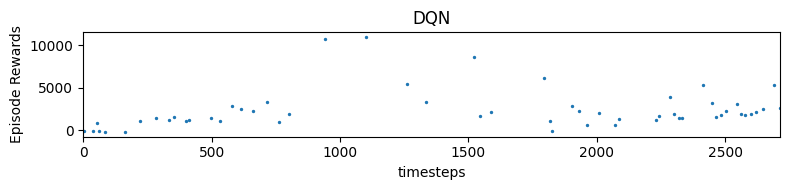

In [14]:
log_dir = "figures/t3/"
timesteps = 30000
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN")

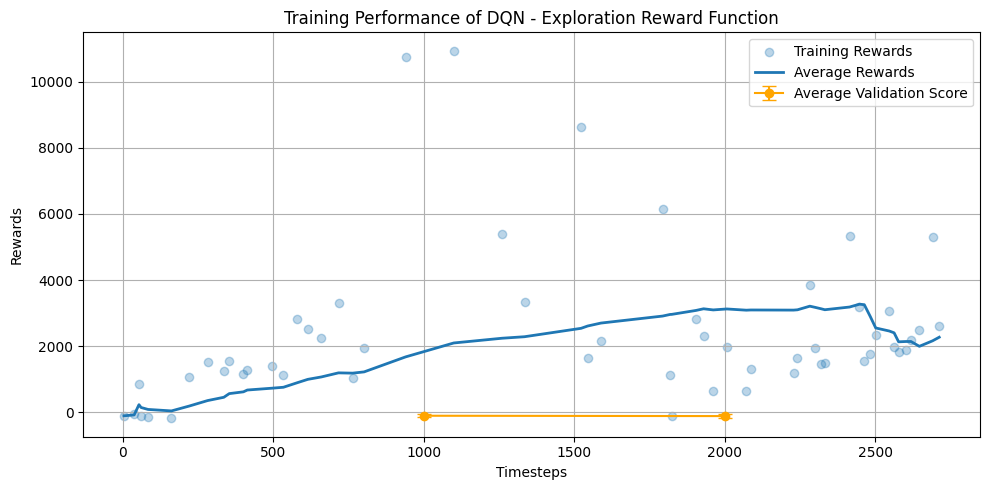

In [36]:
log_dir = "figures/t3/"

max_timesteps = 7000

# Load results
results = load_results(log_dir)
x, y = ts2xy(results, 'timesteps')

# Filter out data points beyond the specified max_timesteps
mask = x <= max_timesteps
x, y = x[mask], y[mask]

# Calculate running average
window_size = 25
y_avg = np.zeros_like(y, dtype=float)
for i in range(len(y)):
    y_avg[i] = np.mean(y[max(0, i - window_size + 1):i + 1])

# Sample data for average validation scores and std of rewards (adjust with your actual data)
# Replace these with your actual validation scores and std of rewards calculations
model_timesteps = [1000, 2000]
avg_rewards = [-101.005, -111.93625]
std_rewards = [43.46395596542108, 59.39498482254468]



# Ensure avg_validation_scores and std_rewards have the same length as x
avg_validation_scores = avg_validation_scores[:len(x)]
std_rewards = std_rewards[:len(x)]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.3, label='Training Rewards')
plt.plot(x, y_avg, c='#1f77b4', label='Average Rewards', linewidth=2)
plt.xlabel('Timesteps')
plt.ylabel('Rewards')
plt.title('Training Performance of DQN - Exploration Reward Function')

# plt.plot(model_timesteps, avg_validation_scores, marker='o', color='orange', label='Average Validation Reward')

# # Plot trend line (smoothed average rewards) from the first graph (validation)
# plt.errorbar(model_timesteps, std_rewards, yerr=[lower_error, upper_error], fmt='o', capsize=5, color='orange', label='Max and Min Validation Reward')

plt.errorbar(model_timesteps, avg_rewards, yerr=std_rewards, fmt='o-', capsize=5, color='orange', label='Average Validation Score')


plt.legend()
# plt.ylim(-750, 1000)  # Adjust y-axis limits as needed
plt.grid(True)
plt.tight_layout()
plt.show()

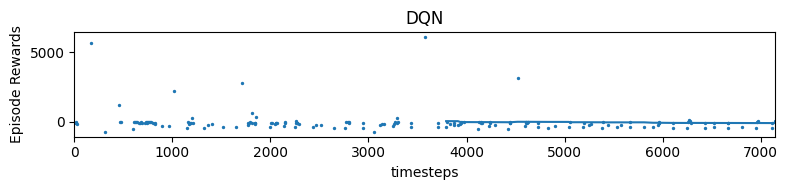

In [38]:
log_dir = "figures/Trial2_greenDistReward/monitor/"
timesteps = 30000
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN")

In [39]:
avg_rewards = [-158.55733154296874, -159.3514761352539, -31.251152648925782, -72.85871978759765, -185.85827514648437, -105.58556518554687, -189.5187173461914]
std_rewards = [105.18804251230216, 99.65457626479717, 212.86234632714334, 416.4017300760138, 162.76453301220954, 1195.3503299015895, 234.78028125542025]

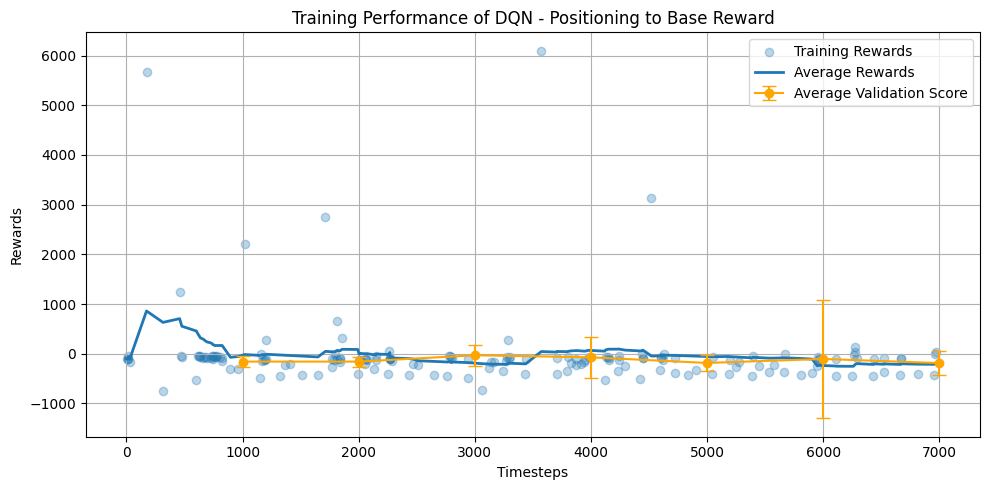

In [40]:
max_timesteps = 7000

# Load results
results = load_results(log_dir)
x, y = ts2xy(results, 'timesteps')

# Filter out data points beyond the specified max_timesteps
mask = x <= max_timesteps
x, y = x[mask], y[mask]

# Calculate running average
window_size = 25
y_avg = np.zeros_like(y, dtype=float)
for i in range(len(y)):
    y_avg[i] = np.mean(y[max(0, i - window_size + 1):i + 1])

# Sample data for average validation scores and std of rewards (adjust with your actual data)
# Replace these with your actual validation scores and std of rewards calculations
model_timesteps = [1000, 2000, 3000, 4000, 5000, 6000, 7000]
avg_validation_scores = [-158.55733154296874, -159.3514761352539, -31.251152648925782, -72.85871978759765, -185.85827514648437, -105.58556518554687, -189.5187173461914]
std_rewards = [105.18804251230216, 99.65457626479717, 212.86234632714334, 416.4017300760138, 162.76453301220954, 1195.3503299015895, 234.78028125542025]


# Ensure avg_validation_scores and std_rewards have the same length as x
avg_validation_scores = avg_validation_scores[:len(x)]
std_rewards = std_rewards[:len(x)]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.3, label='Training Rewards')
plt.plot(x, y_avg, c='#1f77b4', label='Average Rewards', linewidth=2)
plt.xlabel('Timesteps')
plt.ylabel('Rewards')
plt.title('Training Performance of DQN - Positioning to Base Reward')

# plt.plot(model_timesteps, avg_validation_scores, marker='o', color='orange', label='Average Validation Reward')

# # Plot trend line (smoothed average rewards) from the first graph (validation)
# plt.errorbar(model_timesteps, std_rewards, yerr=[lower_error, upper_error], fmt='o', capsize=5, color='orange', label='Max and Min Validation Reward')

plt.errorbar(model_timesteps, avg_validation_scores, yerr=std_rewards, fmt='o-', capsize=5, color='orange', label='Average Validation Score')


plt.legend()
# plt.ylim(-750, 1000)  # Adjust y-axis limits as needed
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

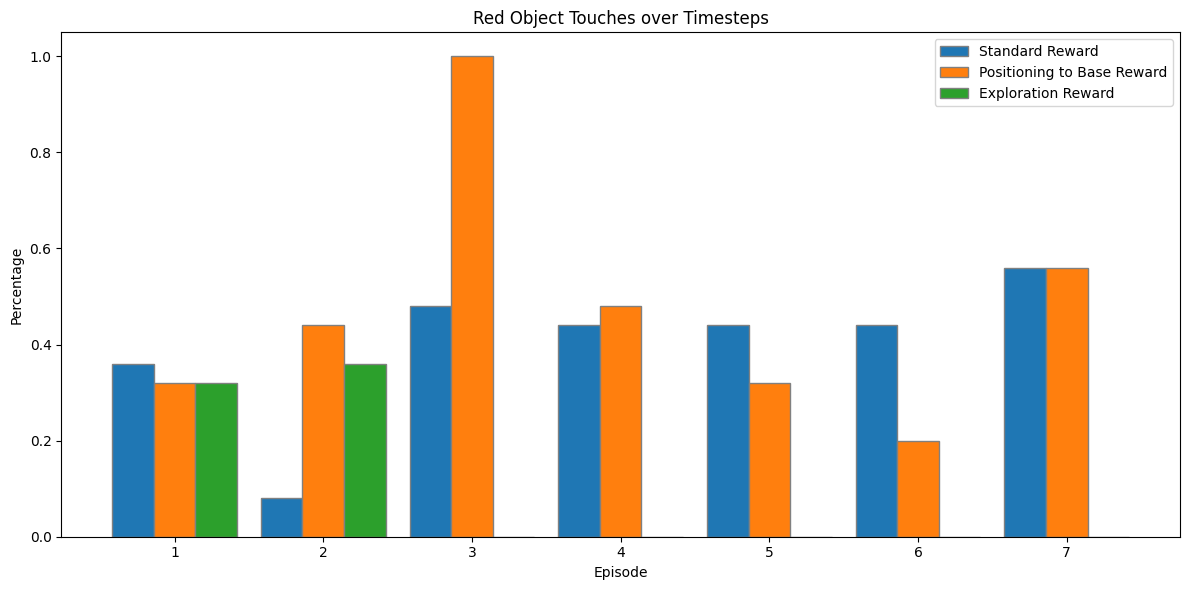

In [32]:
# Data extraction from the provided results
model_timesteps = [1, 2, 3, 4, 5, 6, 7]

avg_rewards = [-158.55733154296874, -159.3514761352539, -31.251152648925782, -72.85871978759765, -185.85827514648437, -105.58556518554687, -189.5187173461914]
std_rewards = [105.18804251230216, 99.65457626479717, 212.86234632714334, 416.4017300760138, 162.76453301220954, 1195.3503299015895, 234.78028125542025]
red_touches = [0.36, 0.08, 0.48, 0.44, 0.44, 0.44, 0.56]
red_objects_trial2 = [0.32, 0.44, 1.0, 0.48, 0.32, 0.2, 0.56]
green_bases_trial2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
red_objects_obtained = [0.32, 0.36, 0, 0, 0, 0, 0]

# Width of the bars
bar_width = 0.28

# Plotting
plt.figure(figsize=(10, 6))

# Position of bars on x-axis
r1 = np.arange(len(model_timesteps))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(12, 6))

plt.bar(r1, red_touches, width=bar_width, edgecolor='grey', label='Standard Reward')
plt.bar(r2, red_objects_trial2, width=bar_width, edgecolor='grey', label='Positioning to Base Reward')
plt.bar(r3, red_objects_obtained, width=bar_width, edgecolor='grey', label='Exploration Reward')

# Add labels
plt.xlabel('Episode')
plt.ylabel('Percentage')
plt.title('Red Object Touches over Timesteps')

# Adjust x-ticks
plt.xticks([r + bar_width for r in range(len(model_timesteps))], model_timesteps)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Results for model saved at 1000 timesteps:
Max reward: 139.71241760253906
Min reward: -352
STD reward: 105.18804251230216
Avg reward: -158.55733154296874
Red objects obtained: 0.32
Green bases reached with red object: 0.0
[-39.31829071044922, -304, -139, 139.71241760253906, -93.49565124511719, -127.70281219482422, -156.5912094116211, -163.32632446289062, -57, -93.47734069824219, -133.57330322265625, -47.27098846435547, -184, -93.46227264404297, -142, -274.4792709350586, -169.42665100097656, -65, -271.81763458251953, -352, -208, -259, -313, -214, -202.7039566040039]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 2000 timesteps:
Max reward: -47.1212158203125
Min reward: -396
STD reward: 99.65457626479717
Avg reward: -159.3514761352539
Red objects obtained: 0.44
Green bases reached with red object: 0.0
[-139, -184, -301.3356704711914, -109, -139.16038513183594, -376, -274, -59, -160.34749603271484, -96.29785919189453, -157.34711456298828, -96.55842590332031, -112.7112045288086, -47.1212158203125, -52.28815460205078, -96.7945556640625, -58.34423065185547, -178.3762969970703, -96.77567291259766, -259.3358612060547, -93.442626953125, -396, -96.55766296386719, -93.53875732421875, -310.4537124633789]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 3000 timesteps:
Max reward: 474.07051849365234
Min reward: -437.9320068359375
STD reward: 212.86234632714334
Avg reward: -31.251152648925782
Red objects obtained: 1.0
Green bases reached with red object: 0.0
[-37.02227020263672, -398.196533203125, -93.442626953125, -66.06373596191406, -437.9320068359375, -121.55137634277344, -59.51222229003906, 366.4595718383789, -62, -48.282432556152344, -93.4405288696289, 103.24285125732422, -96.7945556640625, -7.401214599609375, -282.51143646240234, 207.689453125, -63.32954406738281, 474.07051849365234, 84.01587677001953, -65.5728988647461, -59, -291.3869323730469, -65.5616455078125, -50.472572326660156, 382.71744537353516]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 4000 timesteps:
Max reward: 1910.7084121704102
Min reward: -405.4638214111328
STD reward: 416.4017300760138
Avg reward: -72.85871978759765
Red objects obtained: 0.48
Green bases reached with red object: 0.0
[44.71947479248047, -316.3101119995117, -142.41558837890625, -109.38240051269531, -405.4638214111328, -58.320579528808594, -199.8140106201172, -96.55575561523438, -208, -223.3762969970703, -319.42665100097656, -96.79207611083984, -93.45254516601562, -59, -96.77567291259766, -154, -226.3276596069336, -66, -178.0154266357422, 1910.7084121704102, -93.45254516601562, -93.45254516601562, -184.38697814941406, -96.5727310180664, -259.6024856567383]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 5000 timesteps:
Max reward: 324.7189025878906
Min reward: -502.6997604370117
STD reward: 162.76453301220954
Avg reward: -185.85827514648437
Red objects obtained: 0.32
Green bases reached with red object: 0.0
[-96.57521057128906, -48.281097412109375, -405.31068420410156, -187, -54, -157, 324.7189025878906, -439.13597106933594, -123.60093688964844, -196, -181, -262.6997604370117, -211.3804931640625, -259.3093490600586, -106.38697814941406, -48.27308654785156, -502.6997604370117, -256, -211, -184, -96.54469299316406, -337.47049713134766, -93.47161865234375, -103.03564453125, -411]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 6000 timesteps:
Max reward: 5697.167724609375
Min reward: -456
STD reward: 1195.3503299015895
Avg reward: -105.58556518554687
Red objects obtained: 0.2
Green bases reached with red object: 0.0
[-417, -414, 5697.167724609375, -109, -411.2179870605469, -96.55842590332031, -399, -419.52235412597656, 178.41641998291016, -453, -419.5181579589844, -96.55632781982422, -426.31278228759766, -423.3824005126953, -432, -441.31297302246094, -426.3278503417969, -434.9692687988281, -456, -426.75621795654297, -426.1487503051758, -96.55575561523438, -425.6219177246094, -420.31297302246094, -444.14913177490234]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 7000 timesteps:
Max reward: 180.65977478027344
Min reward: -762
STD reward: 234.78028125542025
Avg reward: -189.5187173461914
Red objects obtained: 0.56
Green bases reached with red object: 0.0
[92.70040130615234, 92.72271728515625, -313, -393, -244.3358612060547, -610, -370, -13.966339111328125, -49.32572937011719, -35.31256866455078, -586.3284225463867, -424.3354797363281, -96.57902526855469, -334.3131637573242, -59, -103.31316375732422, 180.65977478027344, -48.29082489013672, -96.55594635009766, 42.71241760253906, -62, -355, -762, -93.55268096923828, -96.55403900146484]



In [19]:
import re

# The input string with multiple blocks of data
s = '''
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.25     |
|    ep_rew_mean      | -88.6    |
|    exploration_rate | 0.838    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 0        |
|    time_elapsed     | 28       |
|    total_timesteps  | 17       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.2     |
|    ep_rew_mean      | 706      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 0        |
|    time_elapsed     | 594      |
|    total_timesteps  | 458      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 27.2     |
|    n_updates        | 89       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51       |
|    ep_rew_mean      | 413      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 0        |
|    time_elapsed     | 798      |
|    total_timesteps  | 612      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.3     |
|    n_updates        | 127      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.3     |
|    ep_rew_mean      | 294      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16       |
|    fps              | 0        |
|    time_elapsed     | 868      |
|    total_timesteps  | 661      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.02     |
|    n_updates        | 140      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.2     |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 0        |
|    time_elapsed     | 956      |
|    total_timesteps  | 724      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.4     |
|    n_updates        | 155      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.4     |
|    ep_rew_mean      | 172      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24       |
|    fps              | 0        |
|    time_elapsed     | 1001     |
|    total_timesteps  | 754      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.5     |
|    n_updates        | 163      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.7     |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 0        |
|    time_elapsed     | 1071     |
|    total_timesteps  | 803      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.2     |
|    n_updates        | 175      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.2     |
|    ep_rew_mean      | 94.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 32       |
|    fps              | 0        |
|    time_elapsed     | 1284     |
|    total_timesteps  | 965      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.1     |
|    n_updates        | 216      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.5     |
|    ep_rew_mean      | 127      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 36       |
|    fps              | 0        |
|    time_elapsed     | 225      |
|    total_timesteps  | 1171     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15       |
|    n_updates        | 267      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.1     |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 0        |
|    time_elapsed     | 275      |
|    total_timesteps  | 1206     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16       |
|    n_updates        | 276      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.4     |
|    ep_rew_mean      | 72.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 44       |
|    fps              | 0        |
|    time_elapsed     | 692      |
|    total_timesteps  | 1513     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.8     |
|    n_updates        | 353      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.9     |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 0        |
|    time_elapsed     | 1072     |
|    total_timesteps  | 1773     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.6     |
|    n_updates        | 418      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.9     |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 0        |
|    time_elapsed     | 1151     |
|    total_timesteps  | 1817     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.87     |
|    n_updates        | 429      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.1     |
|    ep_rew_mean      | 99.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 0        |
|    time_elapsed     | 1229     |
|    total_timesteps  | 1856     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23       |
|    n_updates        | 438      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.2     |
|    ep_rew_mean      | 78.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 0        |
|    time_elapsed     | 71       |
|    total_timesteps  | 2050     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.58     |
|    n_updates        | 487      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.3     |
|    ep_rew_mean      | 63.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 64       |
|    fps              | 0        |
|    time_elapsed     | 203      |
|    total_timesteps  | 2134     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19       |
|    n_updates        | 508      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.3     |
|    ep_rew_mean      | 51.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 68       |
|    fps              | 0        |
|    time_elapsed     | 390      |
|    total_timesteps  | 2264     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.3     |
|    n_updates        | 540      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.6     |
|    ep_rew_mean      | 43.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 72       |
|    fps              | 0        |
|    time_elapsed     | 418      |
|    total_timesteps  | 2273     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.4     |
|    n_updates        | 543      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 0        |
|    time_elapsed     | 737      |
|    total_timesteps  | 2512     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.51     |
|    n_updates        | 602      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.9     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 0        |
|    time_elapsed     | 1122     |
|    total_timesteps  | 2788     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.4      |
|    n_updates        | 671      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35       |
|    ep_rew_mean      | 4.81     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 0        |
|    time_elapsed     | 1327     |
|    total_timesteps  | 2944     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.96     |
|    n_updates        | 710      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.9     |
|    ep_rew_mean      | -10.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 88       |
|    fps              | 0        |
|    time_elapsed     | 225      |
|    total_timesteps  | 3163     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.78     |
|    n_updates        | 765      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.7     |
|    ep_rew_mean      | -13.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 0        |
|    time_elapsed     | 409      |
|    total_timesteps  | 3286     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.74     |
|    n_updates        | 796      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.8     |
|    ep_rew_mean      | -19.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 0        |
|    time_elapsed     | 631      |
|    total_timesteps  | 3438     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.46     |
|    n_updates        | 834      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.9     |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 0        |
|    time_elapsed     | 1133     |
|    total_timesteps  | 3792     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.8     |
|    n_updates        | 922      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.6     |
|    ep_rew_mean      | 31.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 104      |
|    fps              | 0        |
|    time_elapsed     | 1271     |
|    total_timesteps  | 3875     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.43     |
|    n_updates        | 943      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.2     |
|    ep_rew_mean      | -34.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 0        |
|    time_elapsed     | 1436     |
|    total_timesteps  | 3979     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.25     |
|    n_updates        | 969      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.4     |
|    ep_rew_mean      | -35.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 0        |
|    time_elapsed     | 223      |
|    total_timesteps  | 4151     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.8     |
|    n_updates        | 1012     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.8     |
|    ep_rew_mean      | -38.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 0        |
|    time_elapsed     | 373      |
|    total_timesteps  | 4243     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.5      |
|    n_updates        | 1035     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.2     |
|    ep_rew_mean      | -44.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 0        |
|    time_elapsed     | 670      |
|    total_timesteps  | 4445     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 1086     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | -14.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 0        |
|    time_elapsed     | 877      |
|    total_timesteps  | 4603     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17       |
|    n_updates        | 1125     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.2     |
|    ep_rew_mean      | -18.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 0        |
|    time_elapsed     | 1053     |
|    total_timesteps  | 4724     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74     |
|    n_updates        | 1155     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.8     |
|    ep_rew_mean      | -22.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 0        |
|    time_elapsed     | 65       |
|    total_timesteps  | 5043     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.51     |
|    n_updates        | 1235     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.8     |
|    ep_rew_mean      | -47      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 0        |
|    time_elapsed     | 374      |
|    total_timesteps  | 5253     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 1288     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.4     |
|    ep_rew_mean      | -55.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 0        |
|    time_elapsed     | 663      |
|    total_timesteps  | 5445     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.81     |
|    n_updates        | 1336     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.6     |
|    ep_rew_mean      | -52      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 0        |
|    time_elapsed     | 982      |
|    total_timesteps  | 5669     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.45     |
|    n_updates        | 1392     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.9     |
|    ep_rew_mean      | -83      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 0        |
|    time_elapsed     | 1361     |
|    total_timesteps  | 5958     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.57     |
|    n_updates        | 1464     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.9     |
|    ep_rew_mean      | -94.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 0        |
|    time_elapsed     | 141      |
|    total_timesteps  | 6109     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.46     |
|    n_updates        | 1502     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.2     |
|    ep_rew_mean      | -97.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 0        |
|    time_elapsed     | 362      |
|    total_timesteps  | 6277     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.79     |
|    n_updates        | 1544     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.7     |
|    ep_rew_mean      | -98.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 0        |
|    time_elapsed     | 677      |
|    total_timesteps  | 6519     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.42     |
|    n_updates        | 1604     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.4     |
|    ep_rew_mean      | -99.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 0        |
|    time_elapsed     | 876      |
|    total_timesteps  | 6670     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.469    |
|    n_updates        | 1642     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.1     |
|    ep_rew_mean      | -102     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 0        |
|    time_elapsed     | 1266     |
|    total_timesteps  | 6971     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.19     |
|    n_updates        | 1717     |
----------------------------------

'''

# Split the input string into a list of blocks
blocks = s.split('----------------------------------')

# Initialize an empty list to store the data
data = []

# Loop over the blocks
for block in blocks:
    # Extract the numerical values using regular expressions
    values = re.findall(r'\|\s*[a-z_]+\s*\|\s*(\d+\.?\d*)\s*\|', block)

    # If there are values in the block, convert them to floats and add them to the data list
    if values:
        values = [float(v) for v in values]
        data.append(tuple(values))

# Print the result
print(data)

[(4.25, 0.838, 4.0, 0.0, 28.0, 17.0), (57.2, 706.0, 0.05, 8.0, 0.0, 594.0, 458.0, 0.0001, 27.2, 89.0), (51.0, 413.0, 0.05, 12.0, 0.0, 798.0, 612.0, 0.0001, 12.3, 127.0), (41.3, 294.0, 0.05, 16.0, 0.0, 868.0, 661.0, 0.0001, 5.02, 140.0), (36.2, 220.0, 0.05, 20.0, 0.0, 956.0, 724.0, 0.0001, 13.4, 155.0), (31.4, 172.0, 0.05, 24.0, 0.0, 1001.0, 754.0, 0.0001, 19.5, 163.0), (28.7, 139.0, 0.05, 28.0, 0.0, 1071.0, 803.0, 0.0001, 15.2, 175.0), (30.2, 94.6, 0.05, 32.0, 0.0, 1284.0, 965.0, 0.0001, 14.1, 216.0), (32.5, 127.0, 0.05, 36.0, 0.0, 225.0, 1171.0, 0.0001, 15.0, 267.0), (30.1, 113.0, 0.05, 40.0, 0.0, 275.0, 1206.0, 0.0001, 16.0, 276.0), (34.4, 72.6, 0.05, 44.0, 0.0, 692.0, 1513.0, 0.0001, 15.8, 353.0), (36.9, 108.0, 0.05, 48.0, 0.0, 1072.0, 1773.0, 0.0001, 14.6, 418.0), (34.9, 107.0, 0.05, 52.0, 0.0, 1151.0, 1817.0, 0.0001, 6.87, 429.0), (33.1, 99.2, 0.05, 56.0, 0.0, 1229.0, 1856.0, 0.0001, 23.0, 438.0), (34.2, 78.1, 0.05, 60.0, 0.0, 71.0, 2050.0, 0.0001, 9.58, 487.0), (33.3, 63.3, 0.05,

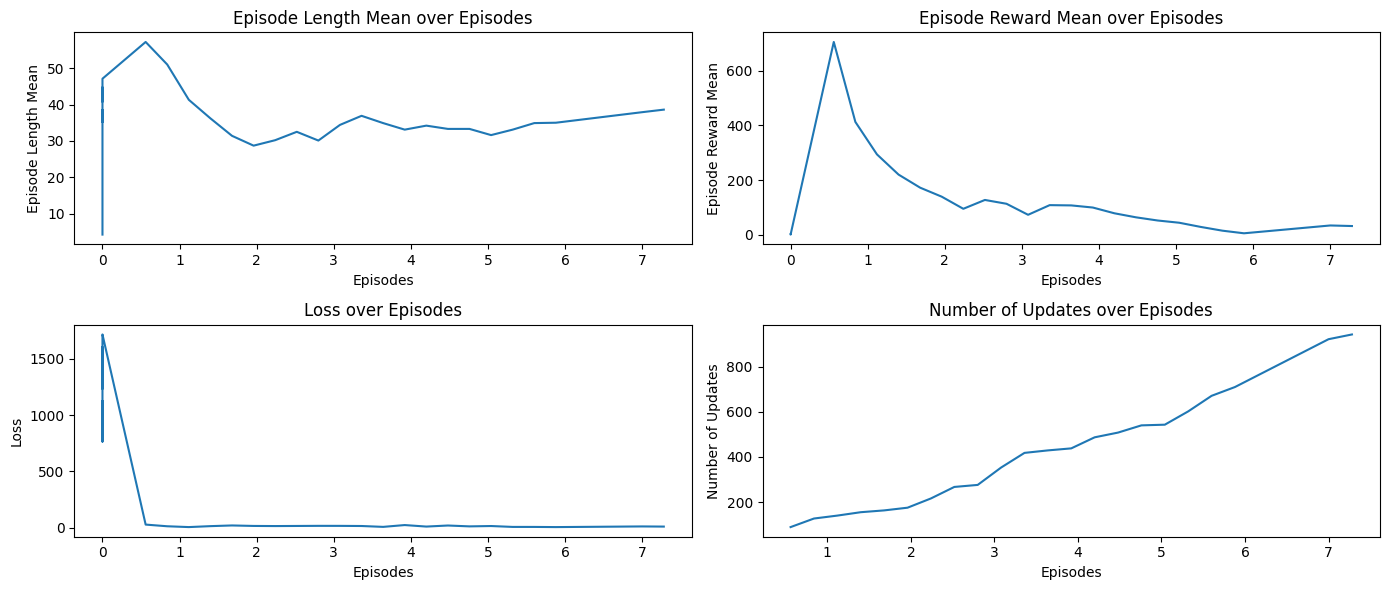

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame
columns = ["ep_len_mean", "ep_rew_mean", "exploration_rate", "episodes", "fps","time_elapsed", "total_timesteps", "learning_rate", "loss", "n_updates"]
df = pd.DataFrame(data, columns=columns)

# Sort the DataFrame by the 'episodes' column
df.sort_values(by='episodes', inplace=True)

df['episodes'] = df['episodes'] * 7
df['episodes'] = df['episodes'] / 100

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.plot(df["episodes"], df["ep_len_mean"])
plt.title("Episode Length Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Length Mean")

plt.subplot(2, 2, 2)
plt.plot(df["episodes"], df["ep_rew_mean"])
plt.title("Episode Reward Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Reward Mean")

plt.subplot(2, 2, 3)
plt.plot(df["episodes"], df["loss"])
plt.title("Loss over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
plt.plot(df["episodes"], df["n_updates"])
plt.title("Number of Updates over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Number of Updates")

plt.tight_layout()
plt.show()

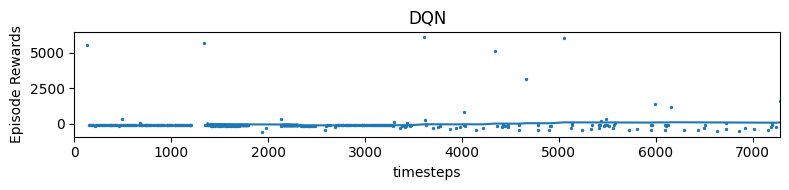

In [21]:
log_dir = "figures/Trial1_standard/monitor/"
timesteps = 30000
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN")

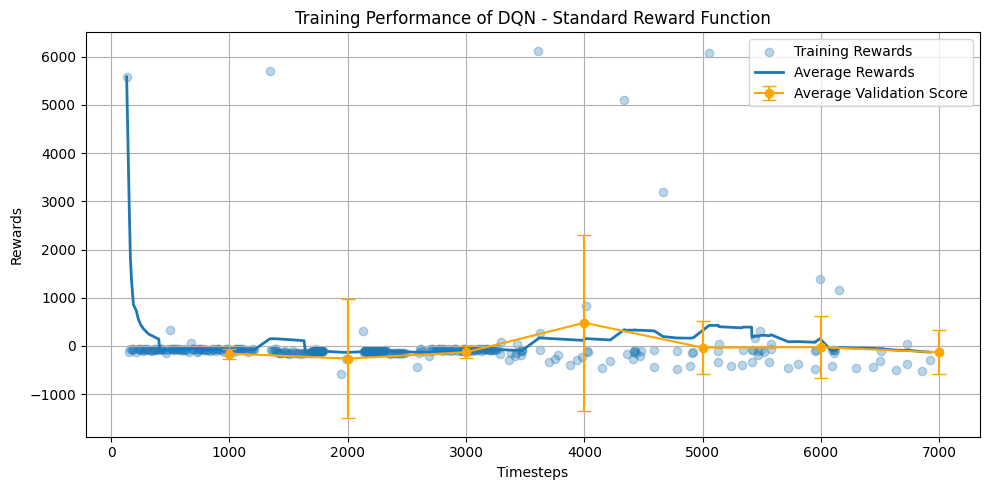

In [26]:
# Define your log directory and maximum timesteps
log_dir = "figures/Trial1_standard/monitor/"
max_timesteps = 7000

# Load results
results = load_results(log_dir)
x, y = ts2xy(results, 'timesteps')

# Filter out data points beyond the specified max_timesteps
mask = x <= max_timesteps
x, y = x[mask], y[mask]

# Calculate running average
window_size = 25
y_avg = np.zeros_like(y, dtype=float)
for i in range(len(y)):
    y_avg[i] = np.mean(y[max(0, i - window_size + 1):i + 1])

# Sample data for average validation scores and std of rewards (adjust with your actual data)
# Replace these with your actual validation scores and std of rewards calculations
model_timesteps = [1000, 2000, 3000, 4000, 5000, 6000, 7000]
avg_validation_scores = [-158.2616799926758, -261.95149200439454, -129.80625885009766, 480.4100582885742, -35.10485107421875, -25.499915771484375, -133.92999725341798]
std_rewards = [103.76986031598655, 1239.3342423686595, 125.09379560781454, 1823.167082167012, 547.5998189842863, 645.3168776321298, 454.90462044303183]


# Ensure avg_validation_scores and std_rewards have the same length as x
avg_validation_scores = avg_validation_scores[:len(x)]
std_rewards = std_rewards[:len(x)]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.3, label='Training Rewards')
plt.plot(x, y_avg, c='#1f77b4', label='Average Rewards', linewidth=2)
plt.xlabel('Timesteps')
plt.ylabel('Rewards')
plt.title('Training Performance of DQN - Standard Reward Function')

# plt.plot(model_timesteps, avg_validation_scores, marker='o', color='orange', label='Average Validation Reward')

# # Plot trend line (smoothed average rewards) from the first graph (validation)
# plt.errorbar(model_timesteps, std_rewards, yerr=[lower_error, upper_error], fmt='o', capsize=5, color='orange', label='Max and Min Validation Reward')

plt.errorbar(model_timesteps, avg_validation_scores, yerr=std_rewards, fmt='o-', capsize=5, color='orange', label='Average Validation Score')


plt.legend()
# plt.ylim(-750, 1000)  # Adjust y-axis limits as needed
plt.grid(True)
plt.tight_layout()
plt.show()

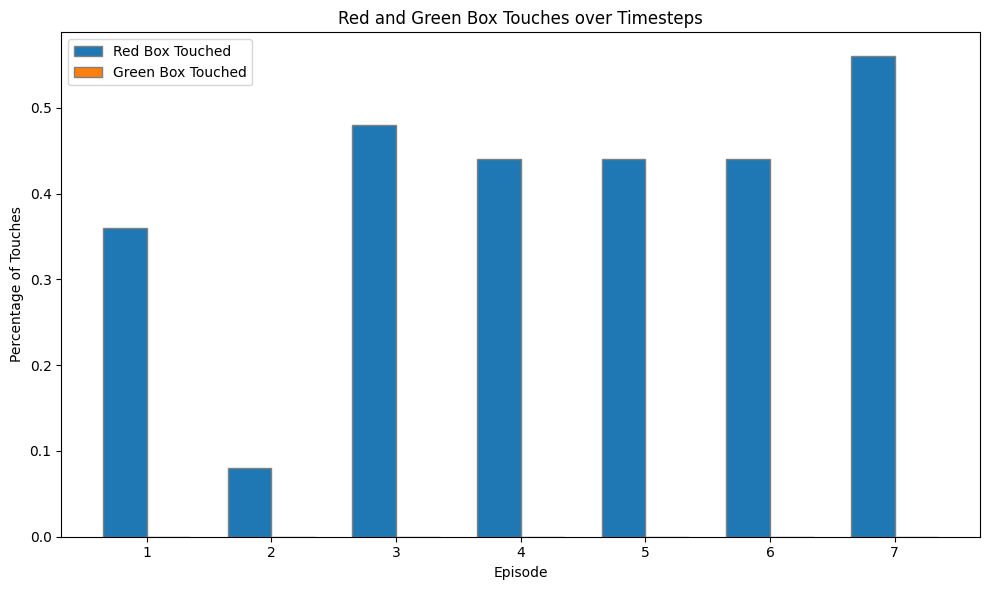

In [23]:
# Data provided
timesteps = [1, 2, 3, 4, 5, 6, 7]
red_touches = [0.36, 0.08, 0.48, 0.44, 0.44, 0.44, 0.56]
green_touches = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Width of the bars
bar_width = 0.35

# Plotting
plt.figure(figsize=(10, 6))

# Position of bars on x-axis
r1 = np.arange(len(timesteps))
r2 = [x + bar_width for x in r1]

plt.bar(r1, red_touches, width=bar_width, edgecolor='grey', label='Red Box Touched')
plt.bar(r2, green_touches, width=bar_width, edgecolor='grey', label='Green Box Touched')

plt.xlabel('Episode')
plt.ylabel('Percentage of Touches')
plt.title('Red and Green Box Touches over Timesteps')
plt.xticks([r + bar_width/2 for r in range(len(timesteps))], timesteps)
plt.legend()

plt.tight_layout()
plt.show()

Results for model saved at 1000 timesteps:
Max reward: 45.6998291015625
Min reward: -384.3263244628906
STD reward: 103.76986031598655
Avg reward: -158.2616799926758
Red objects obtained: 0.36
Green bases reached with red object: 0.0
[-47.270606994628906, -214.46458435058594, -346.58551025390625, -115, -169.18975830078125, 45.6998291015625, -343.49605560302734, -96.5727310180664, -93.52693176269531, -96.7020263671875, -106.33547973632812, -12.305892944335938, -93.52082824707031, -130, -148, -190.3267059326172, -112, -280.3131637573242, -384.3263244628906, -79, -96.5605239868164, -151.00169372558594, -181, -256.24144744873047, -258.5015640258789]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 2000 timesteps:
Max reward: 4480.3521728515625
Min reward: -837
STD reward: 1239.3342423686595
Avg reward: -261.95149200439454
Red objects obtained: 0.08
Green bases reached with red object: 0.0
[-288.1986618041992, -387.1708984375, -834, -233.31024169921875, -523, -376, -753, 3230.7592391967773, -594.9147033691406, -774, -837, -793, -436.0888137817383, -586, -774, -516, -795, -759, -591.589241027832, -644.1275634765625, -813, -687.4985885620117, 4480.3521728515625, -472, -792]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 3000 timesteps:
Max reward: 316
Min reward: -433.4708786010742
STD reward: 125.09379560781454
Avg reward: -129.80625885009766
Red objects obtained: 0.48
Green bases reached with red object: 0.0
[316, -169.07093048095703, -139.35455322265625, -244, -62.31256866455078, -79, -96, -195.5015640258789, -79, -96.56910705566406, -160, -343, -145, -96.55499267578125, -93.5149154663086, -47.291015625, -433.4708786010742, -93.49946594238281, -133.3236541748047, -93.52693176269531, -79, -139, -181, -193, -169.1658935546875]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 4000 timesteps:
Max reward: 6093.7107009887695
Min reward: -499.07093048095703
STD reward: 1823.167082167012
Avg reward: 480.4100582885742
Red objects obtained: 0.44
Green bases reached with red object: 0.0
[-96.55766296386719, 5733.323936462402, -408.3267059326172, 131.7078399658203, -387.35436248779297, -499.07093048095703, -407.5015640258789, -181, -399, 177.71871185302734, -96.55728149414062, -399, -62.31256866455078, -127.32785034179688, -238, -93.50308990478516, 4163.80549621582, -139, 131.4871826171875, -136, 6093.7107009887695, -154, -394.3255615234375, -235, 32.335166931152344]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 5000 timesteps:
Max reward: 2196.316093444824
Min reward: -442.3131637573242
STD reward: 547.5998189842863
Avg reward: -35.10485107421875
Red objects obtained: 0.44
Green bases reached with red object: 0.0
[-96.55766296386719, -391, -139, -442.3131637573242, -402, -181.3276596069336, 2196.316093444824, -166.33547973632812, -96.55766296386719, -337.4710693359375, -1.2992172241210938, 32.40631103515625, -96.56891632080078, -127.07360076904297, -96.56510162353516, -93.49031066894531, 592.3681640625, -250.07360076904297, -166, -396.08580780029297, -289.07360076904297, 965.387809753418, -387.77681732177734, -402, -105.52998352050781]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 6000 timesteps:
Max reward: 2158
Min reward: -415.16038513183594
STD reward: 645.3168776321298
Avg reward: -25.499915771484375
Red objects obtained: 0.44
Green bases reached with red object: 0.0
[-402.35436248779297, -12.299217224121094, -241.47869873046875, 2098.7316818237305, -96.56510162353516, -96.55766296386719, -93.52178192138672, -96.55766296386719, -408.16038513183594, -237.55303955078125, -154.07093048095703, -346.64063262939453, -415.16038513183594, -151.74897003173828, 2158, -349, -161, -93.46780395507812, -136.10449981689453, -96.55594635009766, -355.4504699707031, -256.2759704589844, -187.3255615234375, -310, -196.3804931640625]
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Results for model saved at 7000 timesteps:
Max reward: 1907.3376235961914
Min reward: -921
STD reward: 454.90462044303183
Avg reward: -133.92999725341798
Red objects obtained: 0.56
Green bases reached with red object: 0.0
[-136.5095977783203, -112, -370.3131637573242, -93.44224548339844, -75.92747497558594, -91, -96.55766296386719, -473.65872955322266, -235, -93.47600555419922, -259.6623764038086, -79, -127.3093490600586, -481, -96.55823516845703, -217, -193.3093490600586, -145, -921, -208, -159, -178, 1907.3376235961914, -93.55020141601562, -319.3131637573242]


In [24]:
import re

# The input string with multiple blocks of data
s = '''
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.5     |
|    ep_rew_mean      | 1.33e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 0        |
|    time_elapsed     | 225      |
|    total_timesteps  | 174      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 41.4     |
|    n_updates        | 18       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28       |
|    ep_rew_mean      | 621      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 0        |
|    time_elapsed     | 297      |
|    total_timesteps  | 224      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 37       |
|    n_updates        | 30       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 387      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 0        |
|    time_elapsed     | 358      |
|    total_timesteps  | 266      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 29.4     |
|    n_updates        | 41       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 271      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16       |
|    fps              | 0        |
|    time_elapsed     | 418      |
|    total_timesteps  | 307      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 20.2     |
|    n_updates        | 51       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 200      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 0        |
|    time_elapsed     | 489      |
|    total_timesteps  | 356      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 31.1     |
|    n_updates        | 63       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24       |
|    fps              | 0        |
|    time_elapsed     | 542      |
|    total_timesteps  | 394      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 27.9     |
|    n_updates        | 73       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 0        |
|    time_elapsed     | 593      |
|    total_timesteps  | 430      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.9     |
|    n_updates        | 82       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 94.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 32       |
|    fps              | 0        |
|    time_elapsed     | 668      |
|    total_timesteps  | 485      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 33.1     |
|    n_updates        | 96       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 87       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 36       |
|    fps              | 0        |
|    time_elapsed     | 723      |
|    total_timesteps  | 524      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 20.7     |
|    n_updates        | 105      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 70.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 0        |
|    time_elapsed     | 777      |
|    total_timesteps  | 562      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23.4     |
|    n_updates        | 115      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 57.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 44       |
|    fps              | 0        |
|    time_elapsed     | 842      |
|    total_timesteps  | 608      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.9     |
|    n_updates        | 126      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 0        |
|    time_elapsed     | 919      |
|    total_timesteps  | 663      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.3     |
|    n_updates        | 140      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 0        |
|    time_elapsed     | 975      |
|    total_timesteps  | 703      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.2     |
|    n_updates        | 150      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 29.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 0        |
|    time_elapsed     | 1034     |
|    total_timesteps  | 746      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.6     |
|    n_updates        | 161      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 0        |
|    time_elapsed     | 1088     |
|    total_timesteps  | 784      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.3     |
|    n_updates        | 170      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 64       |
|    fps              | 0        |
|    time_elapsed     | 1163     |
|    total_timesteps  | 840      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.4     |
|    n_updates        | 184      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 68       |
|    fps              | 0        |
|    time_elapsed     | 1227     |
|    total_timesteps  | 886      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.2     |
|    n_updates        | 196      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 4.84     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 72       |
|    fps              | 0        |
|    time_elapsed     | 1285     |
|    total_timesteps  | 928      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23.2     |
|    n_updates        | 206      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.0322   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 0        |
|    time_elapsed     | 1356     |
|    total_timesteps  | 980      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23.2     |
|    n_updates        | 219      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | -4.48    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 0        |
|    time_elapsed     | 45       |
|    total_timesteps  | 1035     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.48     |
|    n_updates        | 233      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | -7.71    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 0        |
|    time_elapsed     | 97       |
|    total_timesteps  | 1071     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 20.7     |
|    n_updates        | 242      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | -10.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 88       |
|    fps              | 0        |
|    time_elapsed     | 150      |
|    total_timesteps  | 1109     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.4     |
|    n_updates        | 252      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | -14.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 0        |
|    time_elapsed     | 227      |
|    total_timesteps  | 1166     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.27     |
|    n_updates        | 266      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | -17      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 0        |
|    time_elapsed     | 284      |
|    total_timesteps  | 1208     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.05     |
|    n_updates        | 276      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 38.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 0        |
|    time_elapsed     | 496      |
|    total_timesteps  | 1375     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.7     |
|    n_updates        | 318      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | -18.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 104      |
|    fps              | 0        |
|    time_elapsed     | 544      |
|    total_timesteps  | 1409     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates        | 327      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | -20.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 0        |
|    time_elapsed     | 619      |
|    total_timesteps  | 1465     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.2     |
|    n_updates        | 341      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 0        |
|    time_elapsed     | 677      |
|    total_timesteps  | 1508     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.5     |
|    n_updates        | 351      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | -25.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 0        |
|    time_elapsed     | 752      |
|    total_timesteps  | 1564     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.7     |
|    n_updates        | 365      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | -27.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 0        |
|    time_elapsed     | 824      |
|    total_timesteps  | 1619     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.2     |
|    n_updates        | 379      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | -29.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 0        |
|    time_elapsed     | 892      |
|    total_timesteps  | 1669     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 27.9     |
|    n_updates        | 392      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | -32.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 0        |
|    time_elapsed     | 938      |
|    total_timesteps  | 1703     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.6     |
|    n_updates        | 400      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | -32.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 0        |
|    time_elapsed     | 961      |
|    total_timesteps  | 1717     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.2     |
|    n_updates        | 404      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -37.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 0        |
|    time_elapsed     | 989      |
|    total_timesteps  | 1735     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16       |
|    n_updates        | 408      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | -39.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 0        |
|    time_elapsed     | 1010     |
|    total_timesteps  | 1747     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.7     |
|    n_updates        | 411      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | -40.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 0        |
|    time_elapsed     | 1035     |
|    total_timesteps  | 1762     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.5     |
|    n_updates        | 415      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | -41.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 0        |
|    time_elapsed     | 1058     |
|    total_timesteps  | 1776     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.4     |
|    n_updates        | 418      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | -44.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 0        |
|    time_elapsed     | 1080     |
|    total_timesteps  | 1789     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 25.1     |
|    n_updates        | 422      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | -47.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 0        |
|    time_elapsed     | 161      |
|    total_timesteps  | 2130     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 507      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | -49      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 0        |
|    time_elapsed     | 186      |
|    total_timesteps  | 2146     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 28.5     |
|    n_updates        | 511      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | -49.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 0        |
|    time_elapsed     | 207      |
|    total_timesteps  | 2158     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.4     |
|    n_updates        | 514      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | -50.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 0        |
|    time_elapsed     | 223      |
|    total_timesteps  | 2166     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.4     |
|    n_updates        | 516      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | -51.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 172      |
|    fps              | 0        |
|    time_elapsed     | 238      |
|    total_timesteps  | 2174     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.38     |
|    n_updates        | 518      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | -52.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 176      |
|    fps              | 0        |
|    time_elapsed     | 263      |
|    total_timesteps  | 2182     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19       |
|    n_updates        | 520      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | -53.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 0        |
|    time_elapsed     | 279      |
|    total_timesteps  | 2190     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.8     |
|    n_updates        | 522      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | -54.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 0        |
|    time_elapsed     | 296      |
|    total_timesteps  | 2198     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17       |
|    n_updates        | 524      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | -55.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 0        |
|    time_elapsed     | 311      |
|    total_timesteps  | 2206     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 526      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | -56.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 192      |
|    fps              | 0        |
|    time_elapsed     | 328      |
|    total_timesteps  | 2215     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.7     |
|    n_updates        | 528      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | -57.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 0        |
|    time_elapsed     | 344      |
|    total_timesteps  | 2223     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.2     |
|    n_updates        | 530      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.56     |
|    ep_rew_mean      | -116     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 0        |
|    time_elapsed     | 360      |
|    total_timesteps  | 2231     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 20.6     |
|    n_updates        | 532      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.3      |
|    ep_rew_mean      | -117     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 0        |
|    time_elapsed     | 376      |
|    total_timesteps  | 2239     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.7     |
|    n_updates        | 534      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.82     |
|    ep_rew_mean      | -116     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 208      |
|    fps              | 0        |
|    time_elapsed     | 394      |
|    total_timesteps  | 2247     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.1     |
|    n_updates        | 536      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.47     |
|    ep_rew_mean      | -114     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 212      |
|    fps              | 0        |
|    time_elapsed     | 410      |
|    total_timesteps  | 2255     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.3     |
|    n_updates        | 538      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.99     |
|    ep_rew_mean      | -113     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 0        |
|    time_elapsed     | 427      |
|    total_timesteps  | 2263     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.5     |
|    n_updates        | 540      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.52     |
|    ep_rew_mean      | -112     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 0        |
|    time_elapsed     | 442      |
|    total_timesteps  | 2271     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.1     |
|    n_updates        | 542      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.11     |
|    ep_rew_mean      | -110     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 0        |
|    time_elapsed     | 459      |
|    total_timesteps  | 2280     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.6     |
|    n_updates        | 544      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | -110     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 0        |
|    time_elapsed     | 476      |
|    total_timesteps  | 2289     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 26.9     |
|    n_updates        | 547      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | -109     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 0        |
|    time_elapsed     | 499      |
|    total_timesteps  | 2297     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23.6     |
|    n_updates        | 549      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | -110     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 236      |
|    fps              | 0        |
|    time_elapsed     | 526      |
|    total_timesteps  | 2305     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.5     |
|    n_updates        | 551      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | -109     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 240      |
|    fps              | 0        |
|    time_elapsed     | 577      |
|    total_timesteps  | 2339     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.4     |
|    n_updates        | 559      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.35     |
|    ep_rew_mean      | -111     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 0        |
|    time_elapsed     | 654      |
|    total_timesteps  | 2397     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.1     |
|    n_updates        | 574      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.69     |
|    ep_rew_mean      | -112     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 0        |
|    time_elapsed     | 719      |
|    total_timesteps  | 2445     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.9     |
|    n_updates        | 586      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.98     |
|    ep_rew_mean      | -116     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 0        |
|    time_elapsed     | 918      |
|    total_timesteps  | 2587     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.4     |
|    n_updates        | 621      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.07     |
|    ep_rew_mean      | -113     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 0        |
|    time_elapsed     | 984      |
|    total_timesteps  | 2637     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.9     |
|    n_updates        | 634      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | -113     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 0        |
|    time_elapsed     | 1089     |
|    total_timesteps  | 2716     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.8     |
|    n_updates        | 653      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.01     |
|    ep_rew_mean      | -112     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 0        |
|    time_elapsed     | 1147     |
|    total_timesteps  | 2759     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.7     |
|    n_updates        | 664      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.38     |
|    ep_rew_mean      | -111     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 0        |
|    time_elapsed     | 1210     |
|    total_timesteps  | 2804     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.8     |
|    n_updates        | 675      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.71     |
|    ep_rew_mean      | -109     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 0        |
|    time_elapsed     | 1266     |
|    total_timesteps  | 2845     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.7     |
|    n_updates        | 686      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.15     |
|    ep_rew_mean      | -109     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 0        |
|    time_elapsed     | 1338     |
|    total_timesteps  | 2897     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.4     |
|    n_updates        | 699      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.64     |
|    ep_rew_mean      | -108     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 0        |
|    time_elapsed     | 1415     |
|    total_timesteps  | 2954     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.5     |
|    n_updates        | 713      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.87     |
|    ep_rew_mean      | -107     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 0        |
|    time_elapsed     | 1460     |
|    total_timesteps  | 2985     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.8     |
|    n_updates        | 721      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.26     |
|    ep_rew_mean      | -106     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 0        |
|    time_elapsed     | 46       |
|    total_timesteps  | 3032     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 732      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.64     |
|    ep_rew_mean      | -105     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 0        |
|    time_elapsed     | 112      |
|    total_timesteps  | 3079     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 30.3     |
|    n_updates        | 744      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.03     |
|    ep_rew_mean      | -104     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 0        |
|    time_elapsed     | 177      |
|    total_timesteps  | 3126     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.97     |
|    n_updates        | 756      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.34     |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 0        |
|    time_elapsed     | 233      |
|    total_timesteps  | 3165     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.5     |
|    n_updates        | 766      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.64     |
|    ep_rew_mean      | -102     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 0        |
|    time_elapsed     | 288      |
|    total_timesteps  | 3203     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.3     |
|    n_updates        | 775      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | -100     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 0        |
|    time_elapsed     | 352      |
|    total_timesteps  | 3248     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.5     |
|    n_updates        | 786      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | -98.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 0        |
|    time_elapsed     | 418      |
|    total_timesteps  | 3296     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 798      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | -102     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 0        |
|    time_elapsed     | 585      |
|    total_timesteps  | 3424     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.07     |
|    n_updates        | 830      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | -101     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 0        |
|    time_elapsed     | 649      |
|    total_timesteps  | 3470     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23.8     |
|    n_updates        | 842      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | -35.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 0        |
|    time_elapsed     | 851      |
|    total_timesteps  | 3625     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.5     |
|    n_updates        | 881      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | -42.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 0        |
|    time_elapsed     | 1175     |
|    total_timesteps  | 3878     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.3     |
|    n_updates        | 944      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | -36.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 0        |
|    time_elapsed     | 26       |
|    total_timesteps  | 4019     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.8     |
|    n_updates        | 979      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 0        |
|    time_elapsed     | 430      |
|    total_timesteps  | 4336     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 29.8     |
|    n_updates        | 1058     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 7.51     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 0        |
|    time_elapsed     | 544      |
|    total_timesteps  | 4422     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.1     |
|    n_updates        | 1080     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 7.94     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 0        |
|    time_elapsed     | 619      |
|    total_timesteps  | 4476     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.5     |
|    n_updates        | 1093     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 35.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 0        |
|    time_elapsed     | 1010     |
|    total_timesteps  | 4781     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.5     |
|    n_updates        | 1170     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.3     |
|    ep_rew_mean      | 35.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 0        |
|    time_elapsed     | 1190     |
|    total_timesteps  | 4919     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.73     |
|    n_updates        | 1204     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | 96.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 0        |
|    time_elapsed     | 179      |
|    total_timesteps  | 5137     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.8     |
|    n_updates        | 1259     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27       |
|    ep_rew_mean      | 88.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 0        |
|    time_elapsed     | 534      |
|    total_timesteps  | 5413     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.9     |
|    n_updates        | 1328     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 89.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 0        |
|    time_elapsed     | 608      |
|    total_timesteps  | 5466     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.8     |
|    n_updates        | 1341     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 92.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 0        |
|    time_elapsed     | 676      |
|    total_timesteps  | 5516     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.8     |
|    n_updates        | 1353     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.8     |
|    ep_rew_mean      | 87.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 0        |
|    time_elapsed     | 943      |
|    total_timesteps  | 5723     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.4     |
|    n_updates        | 1405     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.6     |
|    ep_rew_mean      | 80.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 0        |
|    time_elapsed     | 1244     |
|    total_timesteps  | 5956     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19       |
|    n_updates        | 1463     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.5     |
|    ep_rew_mean      | 91.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 0        |
|    time_elapsed     | 145      |
|    total_timesteps  | 6108     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.4     |
|    n_updates        | 1501     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.1     |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 0        |
|    time_elapsed     | 387      |
|    total_timesteps  | 6295     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 20.4     |
|    n_updates        | 1548     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36       |
|    ep_rew_mean      | 90.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 388      |
|    fps              | 0        |
|    time_elapsed     | 826      |
|    total_timesteps  | 6631     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.8     |
|    n_updates        | 1632     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | 82       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 0        |
|    time_elapsed     | 1211     |
|    total_timesteps  | 6924     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.76     |
|    n_updates        | 1705     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.7     |
|    ep_rew_mean      | 75.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 0        |
|    time_elapsed     | 260      |
|    total_timesteps  | 7199     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 28.4     |
|    n_updates        | 1774     |
----------------------------------


'''

# Split the input string into a list of blocks
blocks = s.split('----------------------------------')

# Initialize an empty list to store the data
data = []

# Loop over the blocks
for block in blocks:
    # Extract the numerical values using regular expressions
    values = re.findall(r'\|\s*[a-z_]+\s*\|\s*(\d+\.?\d*)\s*\|', block)

    # If there are values in the block, convert them to floats and add them to the data list
    if values:
        values = [float(v) for v in values]
        data.append(tuple(values))

# Print the result
print(data)


[(43.5, 0.05, 4.0, 0.0, 225.0, 174.0, 0.0001, 41.4, 18.0), (28.0, 621.0, 0.05, 8.0, 0.0, 297.0, 224.0, 0.0001, 37.0, 30.0), (22.2, 387.0, 0.05, 12.0, 0.0, 358.0, 266.0, 0.0001, 29.4, 41.0), (19.2, 271.0, 0.05, 16.0, 0.0, 418.0, 307.0, 0.0001, 20.2, 51.0), (17.8, 200.0, 0.05, 20.0, 0.0, 489.0, 356.0, 0.0001, 31.1, 63.0), (16.4, 154.0, 0.05, 24.0, 0.0, 542.0, 394.0, 0.0001, 27.9, 73.0), (15.4, 121.0, 0.05, 28.0, 0.0, 593.0, 430.0, 0.0001, 17.9, 82.0), (15.2, 94.7, 0.05, 32.0, 0.0, 668.0, 485.0, 0.0001, 33.1, 96.0), (14.6, 87.0, 0.05, 36.0, 0.0, 723.0, 524.0, 0.0001, 20.7, 105.0), (14.1, 70.9, 0.05, 40.0, 0.0, 777.0, 562.0, 0.0001, 23.4, 115.0), (13.8, 57.1, 0.05, 44.0, 0.0, 842.0, 608.0, 0.0001, 24.9, 126.0), (13.8, 45.2, 0.05, 48.0, 0.0, 919.0, 663.0, 0.0001, 15.3, 140.0), (13.5, 38.8, 0.05, 52.0, 0.0, 975.0, 703.0, 0.0001, 22.2, 150.0), (13.3, 29.4, 0.05, 56.0, 0.0, 1034.0, 746.0, 0.0001, 12.6, 161.0), (13.1, 22.4, 0.05, 60.0, 0.0, 1088.0, 784.0, 0.0001, 18.3, 170.0), (13.1, 15.3, 0.05

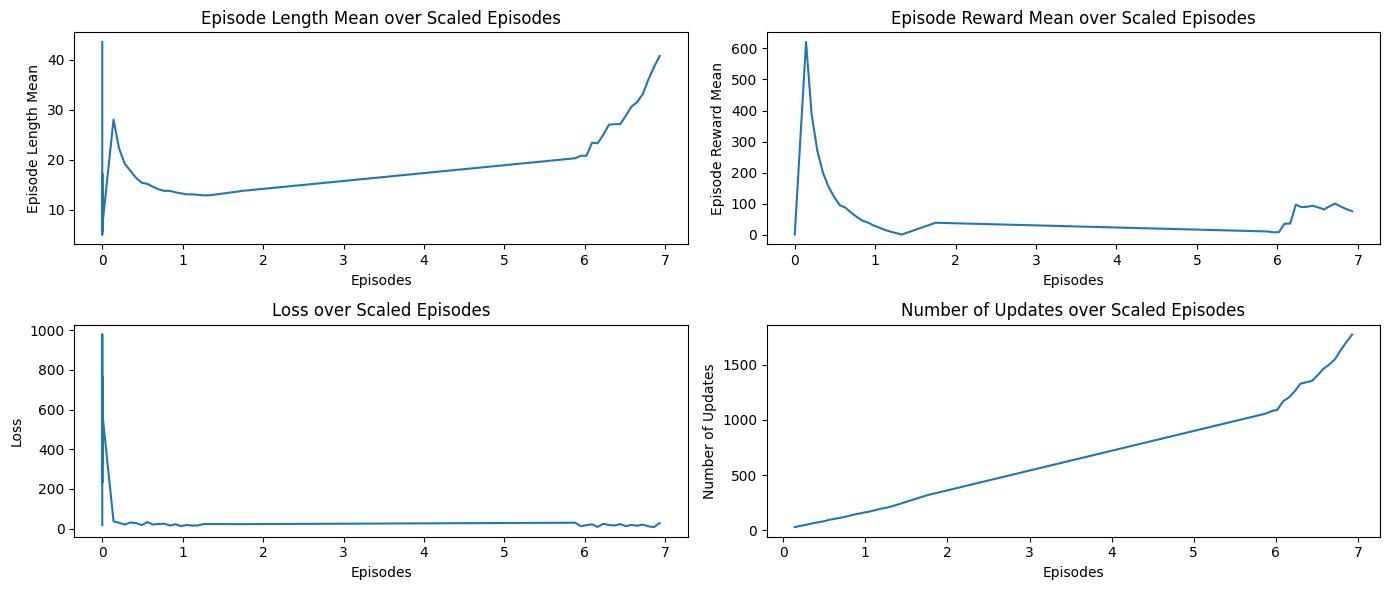

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame
columns = ["ep_len_mean", "ep_rew_mean", "exploration_rate", "episodes", "fps","time_elapsed", "total_timesteps", "learning_rate", "loss", "n_updates"]
df = pd.DataFrame(data, columns=columns)

# Sort the DataFrame by the 'episodes' column
df.sort_values(by='episodes', inplace=True)

# Define the scaling function
def scale_value(x, min_x=0, max_x=400, min_y=0, max_y=7):
    y = (x - min_x) / (max_x - min_x) * (max_y - min_y) + min_y
    return y

# Apply the scaling function to the episodes column
df['scaled_episodes'] = df['episodes'].apply(scale_value)

# Sort the DataFrame by the 'scaled_episodes' column
df.sort_values(by='scaled_episodes', inplace=True)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.plot(df["scaled_episodes"], df["ep_len_mean"])
plt.title("Episode Length Mean over Scaled Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Length Mean")

plt.subplot(2, 2, 2)
plt.plot(df["scaled_episodes"], df["ep_rew_mean"])
plt.title("Episode Reward Mean over Scaled Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Reward Mean")

plt.subplot(2, 2, 3)
plt.plot(df["scaled_episodes"], df["loss"])
plt.title("Loss over Scaled Episodes")
plt.xlabel("Episodes")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
plt.plot(df["scaled_episodes"], df["n_updates"])
plt.title("Number of Updates over Scaled Episodes")
plt.xlabel("Episodes")
plt.ylabel("Number of Updates")

plt.tight_layout()
plt.show()